1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

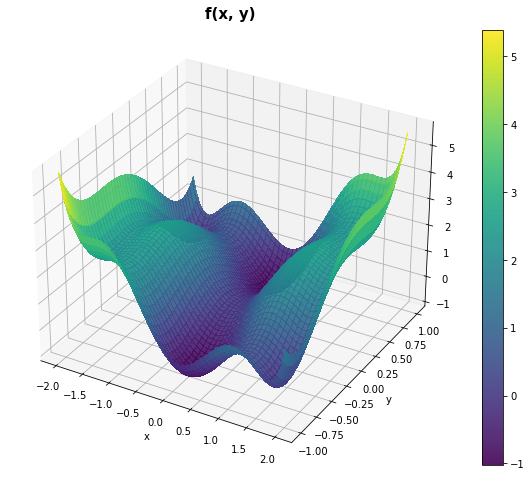

In [79]:
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

## PLOT
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = f([x, y])

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis,  linewidth=0, antialiased=False, alpha=0.9)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.8)

# Labels
ax.set_title('f(x, y)', fontweight = 'bold', fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('f(x, y)')

plt.show()


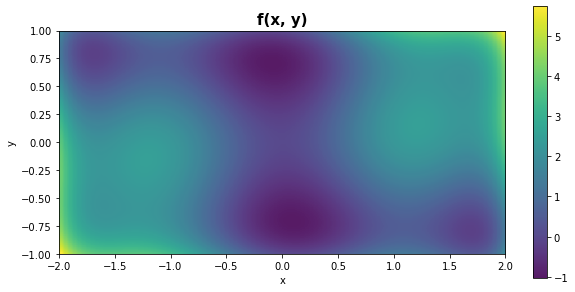

In [80]:
# FIND VISUALLY THE REGIONS 
plt.figure(figsize=(10, 5))
plt.imshow(z, extent=(-2, 2, -1, 1), cmap=cm.viridis, alpha=0.9, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)', fontweight = 'bold', fontsize = 15)

plt.colorbar();

In [81]:
import pandas as pd
from IPython.display import display

# LOCAL MINIMA
starting_guesses = [[-1.5, 0], [1.5, 0], [0, -1], [0, 1]]
solutions = [optimize.minimize(f, x0 = i) for i in starting_guesses]

min_loc = {'initial guess': starting_guesses, 
           'x':[solution['x'][0] for solution in solutions], 
           'y':[solution['x'][1] for solution in solutions], 
           'f':[solution['fun'] for solution in solutions]}

minima = pd.DataFrame(min_loc)
print('Local minima:')
display(minima)

# GLOBAL MINIMA
print('Global minima:')
display(minima.iloc[2:, :])


Local minima:


,initial guess,x,y,f
0,"[-1.5, 0]",-1.703607,0.796084,-0.215464
1,"[1.5, 0]",1.703607,-0.796084,-0.215464
2,"[0, -1]",0.089842,-0.712656,-1.031628
3,"[0, 1]",-0.089842,0.712656,-1.031628


Global minima:


,initial guess,x,y,f
2,"[0, -1]",0.089842,-0.712656,-1.031628
3,"[0, 1]",-0.089842,0.712656,-1.031628


There are 2 global minima. The function value at these points is $-1.031628$.

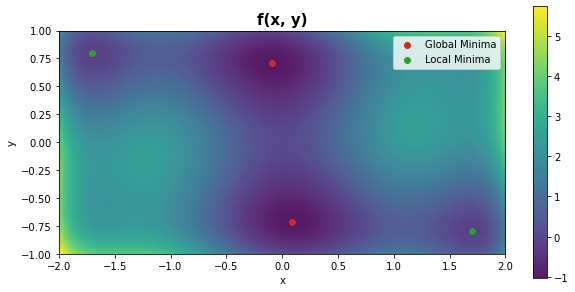

In [82]:
# PLOT AGAIN THE REGION WITH THE LOCAL AND GLOBAL MINIMA

plt.figure(figsize=(10, 5))
plt.imshow(z, extent=(-2, 2, -1, 1), cmap=cm.viridis, alpha=0.9, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)', fontweight = 'bold', fontsize = 15)
plt.colorbar();

plt.scatter(minima['x'][2:], minima['y'][2:], label = 'Global Minima', color='C3')
plt.scatter(minima['x'][:2], minima['y'][:2], label = 'Local Minima', color='C2')
plt.legend();



In [83]:
# STARTING POINT (0, 0)
print('Metod: Nelder-Mead')
solution_zero = optimize.minimize(f, [0, 0], method = 'Nelder-Mead')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: Powell')
solution_zero = optimize.minimize(f, [0, 0], method = 'Powell')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: CG')
solution_zero = optimize.minimize(f, [0, 0], method = 'CG')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: BFGS')
solution_zero = optimize.minimize(f, [0, 0], method = 'BFGS')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: TNC')
solution_zero = optimize.minimize(f, [0, 0], method = 'TNC')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

from scipy.optimize import basinhopping
print('\nMetod: basinhopping')
solution_zero = basinhopping(f, [0,0], stepsize=1) 
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])


Metod: Nelder-Mead
Solution: [-0.08985145  0.71266538]
Message: Optimization terminated successfully.

Metod: Powell
Solution: [-0.08984201  0.71265634]
Message: Optimization terminated successfully.

Metod: CG
Solution: [0. 0.]
Message: Optimization terminated successfully.

Metod: BFGS
Solution: [0. 0.]
Message: Optimization terminated successfully.

Metod: TNC
Solution: [0. 0.]
Message: Local minimum reached (|pg| ~= 0)

Metod: basinhopping
Solution: [-0.08984202  0.7126564 ]
Message: ['requested number of basinhopping iterations completed successfully']


For an initial guess of $(x, y) = (0, 0)$, some methods ('Nelder-Mead', 'Powell', 'basinhopping') are able to get the correct solution, while the others remain stucked in the starting point, even if the message says 'Optimization terminated successfully'. 

In [84]:
# LET'S TRY TO FIND THE GLOBAL MINIMA MANUALLY, WITHOUT HAVING AD IDEA OF A POSSIBLE GOOD STARTING POINT

initial_guess = [i for i in zip(np.random.uniform(-2, 2, 10), np.random.uniform(-1, 1, 10))]
solutions = [optimize.minimize(f, x0) for x0 in initial_guess]
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]

print('Solution:', solution['x'])
print('Starting point: (x, y) =', list(initial_guess)[idx])
print('Message:', solution['message'])
print('Function value:', solution['fun'])


Solution: [-0.08984202  0.7126564 ]
Starting point: (x, y) = (-0.9775468180669327, 0.3340418333393138)
Message: Optimization terminated successfully.
Function value: -1.0316284534898772


In [85]:
# I WANT TO CHECK ALSO WHAT HAPPENS IF I SELECT A LARGER REGION

initial_guess = [i for i in zip(np.random.uniform(-20000, 20000, 10), np.random.uniform(-10000, 10000, 10))]
solutions = [optimize.minimize(f, x0) for x0 in initial_guess]
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]

print('Solution:', solution['x'])
print('Starting point: (x, y) =', list(initial_guess)[idx])
print('Message:', solution['message'])
print('Function value:', solution['fun'])

Solution: [-0.08984201  0.7126564 ]
Starting point: (x, y) = (14096.944623391224, -6553.938539132305)
Message: Optimization terminated successfully.
Function value: -1.031628453489877


Notice I can still get a very good solution, even with a small number of random starting points. Moreover, the algorithm is able to converge to the good solution even if the starting point is very far from it. 

However, manually, without a prior knowledge on the possible positions of the minima, it is difficult to get both of them. Still, given the first one, I could try to find all the local minima in which the function has a value close to the one of the global minima found. 

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [86]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold', fontsize='15')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

In [87]:
# Data
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

dataset = pd.DataFrame({'Month': months, 'T max': Tmax, 'T min': Tmin})
print('Dataset of temperatures:')
display(dataset)

# Suitable functions
import math as m
def f_sinq(x, A, T, hshift, vshift):
    return A*np.sin(m.pi/T*x+hshift)**2 + vshift

def f_gauss(x, A, mu, std, vshift):
    return A*np.exp(-(x-mu)**2/(2*std**2))+vshift

# Fitting
## sinq
popt_M_sinq, pcov_M_sinq = optimize.curve_fit(f_sinq, np.arange(12), Tmax, p0=[10, 12, 0, 20])
popt_m_sinq, pcov_m_sinq = optimize.curve_fit(f_sinq, np.arange(12), Tmin, p0=[60, 12, 0, -60])

pstd_M_sinq = [np.sqrt(pcov_M_sinq[i,i]) for i in np.arange(4)]
pstd_m_sinq = [np.sqrt(pcov_m_sinq[i,i]) for i in np.arange(4)]

params = [[i, j] for i, j in zip(popt_M_sinq, popt_m_sinq)]
params_errors = [[i, j] for i, j in zip(pstd_M_sinq, pstd_m_sinq)]

params_sinq = pd.DataFrame({'A': params[0], 'Error (A)': params_errors[0],
           'T': params[1], 'Error (T)': params_errors[1], 
           'B': params[2], 'Error (B)': params_errors[2],
           'C': params[3], 'Error (C)': params_errors[3]}, index=['T max', 'T min'])

print('Sine squared fitting function parameters:')
display(params_sinq)

## gauss
popt_M_gauss, pcov_M_gauss = optimize.curve_fit(f_gauss, range(12), Tmax, p0=[30, 10, 5, 20])
popt_m_gauss, pcov_m_gauss = optimize.curve_fit(f_gauss, range(12), Tmin, p0=[40, 10, 5, -60])

pstd_M_gauss = [np.sqrt(pcov_M_gauss[i,i]) for i in range(4)]
pstd_m_gauss = [np.sqrt(pcov_m_gauss[i,i]) for i in range(4)]

params = [[i, j] for i, j in zip(popt_M_gauss, popt_m_gauss)]
params_errors = [[i, j] for i, j in zip(pstd_M_gauss, pstd_m_gauss)]

params_gauss = pd.DataFrame({'A': params[0], 'Error (A)': params_errors[0],
           'mu': params[1], 'Error (mu)': params_errors[1], 
           'std': params[2], 'Error (std)': params_errors[2], 
           'B': params[2], 'Error (B)': params_errors[3]}, index=['T max', 'T min'])

print('Gaussian function parameters:')
display(params_gauss)


Dataset of temperatures:


,Month,T max,T min
0,Jan,17,-62
1,Feb,19,-59
2,Mar,21,-56
3,April,28,-46
4,May,33,-32
5,June,38,-18
6,July,37,-9
7,Aug,37,-13
8,Sept,31,-25
9,Oct,23,-46


Sine squared fitting function parameters:


,A,Error (A),T,Error (T),B,Error (B),C,Error (C)
T max,21.163399,0.820157,10.608575,0.379421,-0.123930,0.063011,17.367936,0.581770
T min,50.299240,2.629124,10.448972,0.400308,-0.273153,0.071525,-61.862186,1.663816


Gaussian function parameters:


,A,Error (A),mu,Error (mu),std,Error (std),B,Error (B)
T max,23.092087,1.152655,5.735816,0.079468,2.294436,0.165960,2.294436,1.176540
T min,52.649290,1.403334,6.164526,0.047207,1.975900,0.075981,1.975900,1.188808


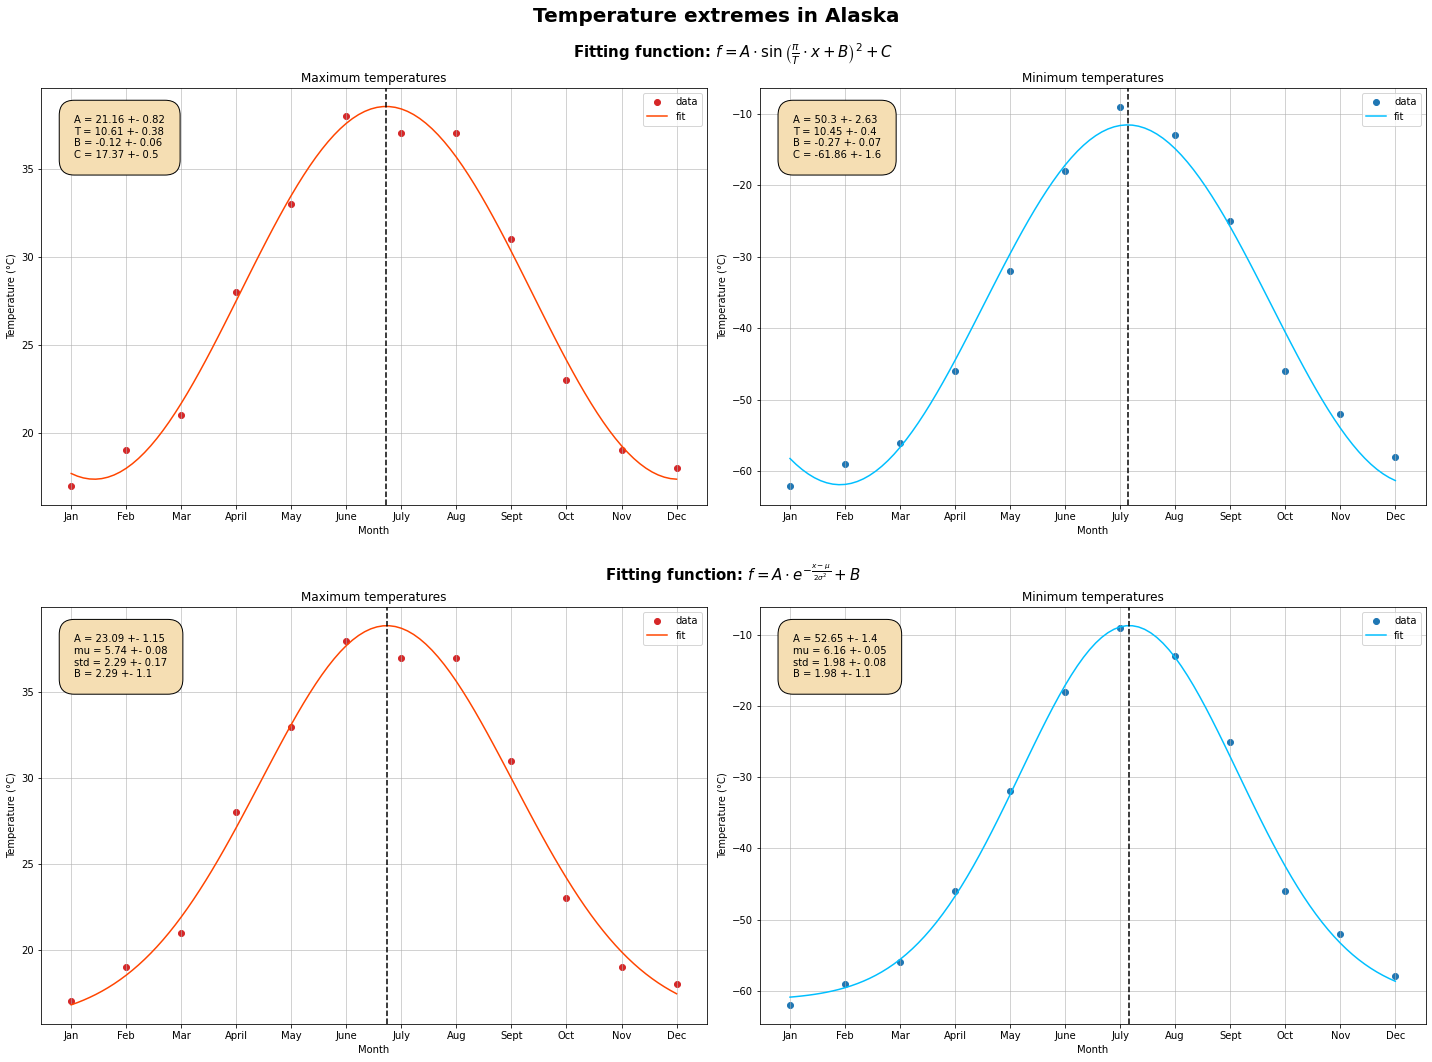

In [88]:
# Plot 
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Temperature extremes in Alaska', fontweight='bold', fontsize='20' )
grid = plt.GridSpec(2, 2)

## Data
for i in range(2):
    ax[i, 0].scatter(months, Tmax, color='C3', label='data')
    ax[i, 0].set_xlabel('Month')
    ax[i, 0].set_ylabel('Temperature (°C)')
    ax[i, 0].set_title('Maximum temperatures')

    ax[i, 1].scatter(months, Tmin, color='C0', label='data')
    ax[i, 1].set_xlabel('Month')
    ax[i, 1].set_ylabel('Temperature (°C)')
    ax[i, 1].set_title('Minimum temperatures')


## Fitting curves
x_temp = np.linspace(0, 11, 100)

### sinq
ax[0, 0].plot(x_temp, f_sinq(x_temp, *popt_M_sinq), color='orangered', label='fit')
ax[0, 1].plot(x_temp, f_sinq(x_temp, *popt_m_sinq), color='deepskyblue', label='fit')
ax[0, 0].legend()
ax[0, 1].legend()

ax[0, 0].axvline(popt_M_sinq[1]*(0.5-popt_M_sinq[2]/m.pi), color='black', linestyle='--')
ax[0, 1].axvline(popt_m_sinq[1]*(0.5-popt_m_sinq[2]/m.pi), color='black', linestyle='--')

create_subtitle(fig, grid[0, ::], r'Fitting function: $f = A\cdot\sin\left(\frac{\pi}{T}\cdot x + B\right)^2+C$')

### gauss
ax[1, 0].plot(x_temp, f_gauss(x_temp, *popt_M_gauss), color='orangered', label='fit')
ax[1, 1].plot(x_temp, f_gauss(x_temp, *popt_m_gauss), color='deepskyblue', label='fit')
ax[1, 0].legend()
ax[1, 1].legend()

ax[1, 0].axvline(popt_M_gauss[1], color='black', linestyle='--')
ax[1, 1].axvline(popt_m_gauss[1], color='black', linestyle='--')

create_subtitle(fig, grid[1, ::], r'Fitting function: $f = A\cdot e^{-\frac{x-\mu}{2\sigma^2}}+B$')

## Results
text_M_sinq = ''
for i in range(0, 8, 2):
    text_M_sinq += params_sinq.columns[i] + ' = ' + str(round(params_sinq.iloc[0, i], 2)) + ' +- ' + str(round(params_sinq.iloc[0, i+1],2))+'\n'
text_m_sinq = ''
for i in range(0, 8, 2):
    text_m_sinq += params_sinq.columns[i] + ' = ' + str(round(params_sinq.iloc[1, i], 2)) + ' +- ' + str(round(params_sinq.iloc[1, i+1],2))+'\n'
text_M_gauss = ''
for i in range(0, 8, 2):
    text_M_gauss += params_gauss.columns[i] + ' = ' + str(round(params_gauss.iloc[0, i], 2)) + ' +- ' + str(round(params_gauss.iloc[0, i+1],2))+'\n'
text_m_gauss = ''
for i in range(0, 8, 2):
    text_m_gauss += params_gauss.columns[i] + ' = ' + str(round(params_gauss.iloc[1, i], 2)) + ' +- ' + str(round(params_gauss.iloc[1, i+1],2))+'\n'
    
text_plot = [[text_M_sinq[:-2], text_m_sinq[:-2]], [text_M_gauss[:-2], text_m_gauss[:-2]]]

for i in range(2):
    for j in range(2):
        ax[i, j].text(0.05, 0.88, 
            s= text_plot[i][j],
            transform=ax[i,j].transAxes,
            bbox={'facecolor': 'wheat', 'alpha': 1, 'pad': 1.5, 'boxstyle':'round'},
            verticalalignment='center', 
            );
        
        ax[i, j].grid(alpha=0.7)

## Settings        
fig.tight_layout()  
fig.set_facecolor('w')


Looking at these figures, both fits seem to be reasonable. In particular, apparently the gaussian function fits very well the data. 

Let us extend these results outside the given time interval and see what happens.

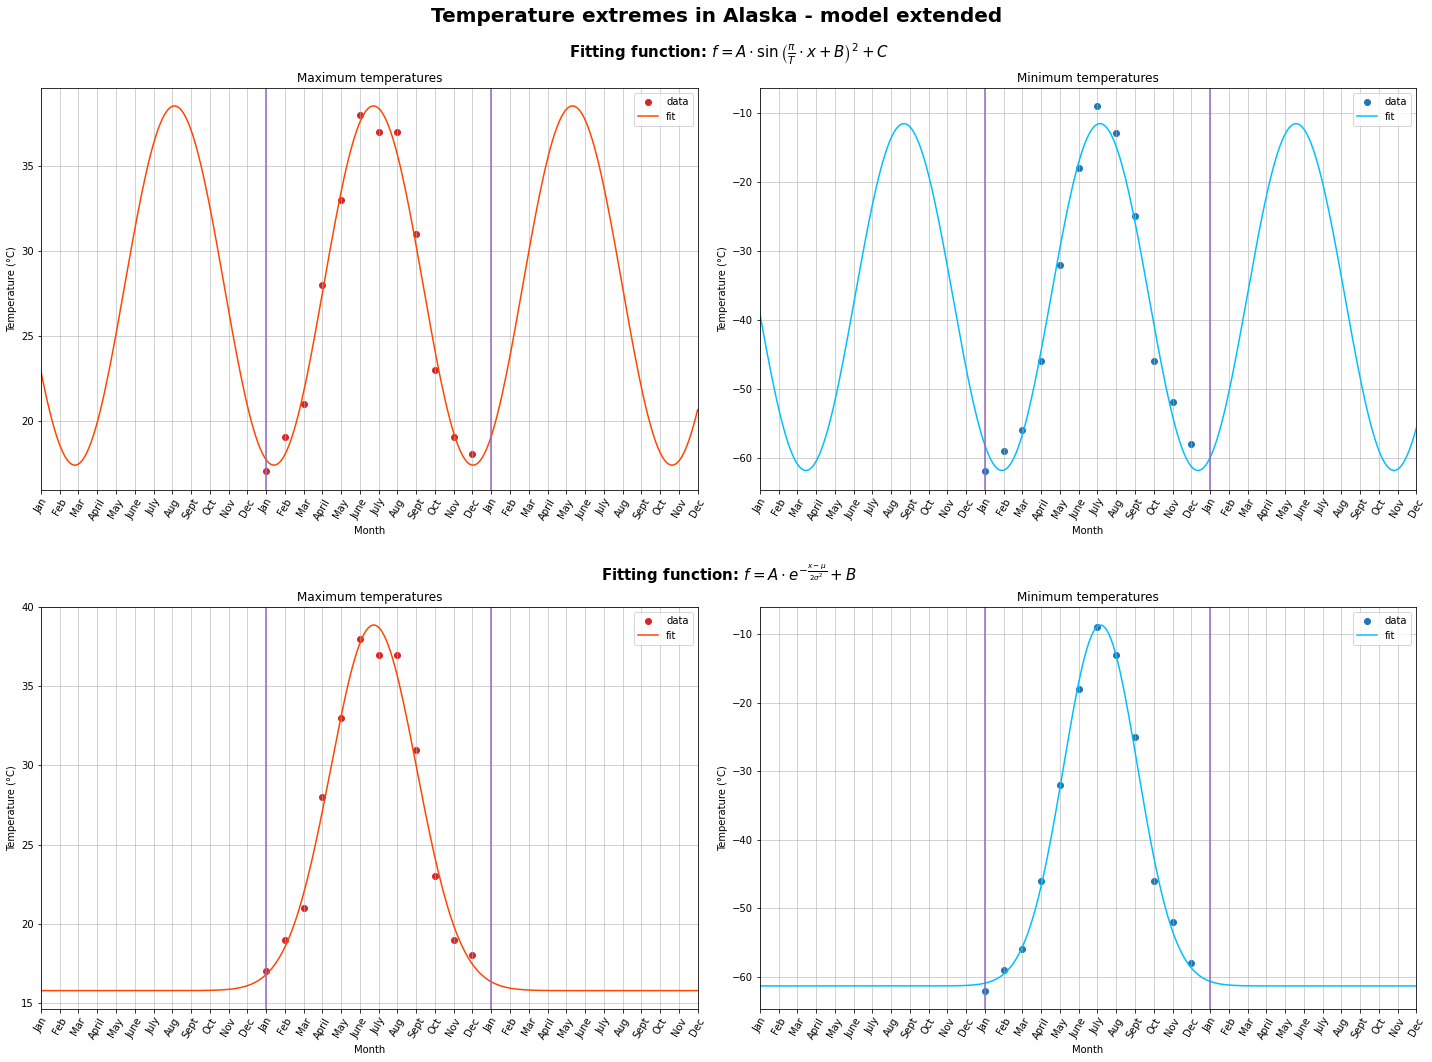

In [89]:
# New Plot 
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Temperature extremes in Alaska - model extended', fontweight='bold', fontsize='20' )
grid = plt.GridSpec(2, 2)

## Data
for i in range(2):
    ax[i, 0].scatter(months, Tmax, color='C3', label='data')
    ax[i, 0].set_xlabel('Month')
    ax[i, 0].set_ylabel('Temperature (°C)')
    ax[i, 0].set_title('Maximum temperatures')

    ax[i, 1].scatter(months, Tmin, color='C0', label='data')
    ax[i, 1].set_xlabel('Month')
    ax[i, 1].set_ylabel('Temperature (°C)')
    ax[i, 1].set_title('Minimum temperatures')


## Fitting curves
x_temp = np.linspace(-12, 23, 300)

### sinq
ax[0, 0].plot(x_temp, f_sinq(x_temp, *popt_M_sinq), color='orangered', label='fit')
ax[0, 1].plot(x_temp, f_sinq(x_temp, *popt_m_sinq), color='deepskyblue', label='fit')
ax[0, 0].legend()
ax[0, 1].legend()

create_subtitle(fig, grid[0, ::], r'Fitting function: $f = A\cdot\sin\left(\frac{\pi}{T}\cdot x+B\right)^2+C$')

### gauss
ax[1, 0].plot(x_temp, f_gauss(x_temp, *popt_M_gauss), color='orangered', label='fit')
ax[1, 1].plot(x_temp, f_gauss(x_temp, *popt_m_gauss), color='deepskyblue', label='fit')
ax[1, 0].legend()
ax[1, 1].legend()

create_subtitle(fig, grid[1, ::], r'Fitting function: $f = A\cdot e^{-\frac{x-\mu}{2\sigma^2}}+B$')

## Results
for i in range(2):
    for j in range(2):
        # ax[i, j].text(0.05, 0.88, 
        #     s= text_plot[i][j],
        #     transform=ax[i,j].transAxes,
        #     bbox={'facecolor': 'wheat', 'alpha': 1, 'pad': 1.5, 'boxstyle':'round'},
        #     verticalalignment='center', 
        #     );
        
        ax[i, j].grid(alpha=0.7)
        ax[i, j].xaxis.set_tick_params(rotation=60)
        ax[i, j].set_xticks(ticks=range(-12, 24))
        ax[i, j].set_xticklabels(months*3)
        ax[i, j].set_xlim(-12, 23)
        ax[i, j].axvline(0, color='C4')
        ax[i, j].axvline(12, color='C4')

## Settings        
fig.tight_layout()  
fig.set_facecolor('w')

When we extend the 2 models outside the given interval, some critical issues appear. First of all, the gaussian model extends very badly outside the single year interval. The function is almost constant before and after the given year, so this model does not seem a good solution. 

The sine squared function partially solves this problem. However, it still has some critical aspects, since the both the amplitude and the period are constant during the years, so we are not considering possible variations of this parameters on a larger scale. 

In conclusion, it is almost impossible to get a solution that is relevant and extends well also outside the given interval, due to the fact that with the given dataset we have no knowledge about what happens on a longer timescale. On the other hand, if we consider a single year, both solutions fit well the data, but it is very difficult to extract good informations from them. 

Anyway, let us perform a goodness-of-fit test

In [107]:
# GOODNESS OF FIT

months_num = range(0, 12)

## sinq
residuals = Tmax - f_sinq(months_num, *popt_M_sinq)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmax-np.mean(Tmax))**2)
R2_sM = 1 - (SSR/TSS)

residuals = Tmin - f_sinq(months_num, *popt_m_sinq)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmin-np.mean(Tmin))**2)
R2_sm = 1 - (SSR/TSS)

## gauss
residuals = Tmax - f_gauss(months_num, *popt_M_gauss)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmax-np.mean(Tmax))**2)
R2_gM = 1 - (SSR/TSS)

residuals = Tmin - f_gauss(months_num, *popt_m_gauss)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmin-np.mean(Tmin))**2)
R2_gm = 1 - (SSR/TSS)

## results 
print('Goodness of fit: look at R2')
print('\nSinq \nTmax: %.4f \nTmin: %.4f' %(R2_sM, R2_sm))
print('\nGaus \nTmax: %.4f \nTmin: %.4f' %(R2_gM, R2_gm))
print('\nThe result seems good')

Goodness of fit: look at R2

Sinq 
Tmax: 0.9883 
Tmin: 0.9787

Gaus 
Tmax: 0.9859 
Tmin: 0.9946

The result seems good


In [101]:
# Time offset for min and max temperatures
## sinq
offset_Tmax = params_sinq['T'][0]*(0.5-params_sinq['B'][0]/m.pi) 
offset_Tmin = params_sinq['T'][1]*(0.5-params_sinq['B'][1]/m.pi)
error_Tmax = (params_sinq['Error (T)'][0]*params_sinq['Error (B)'][0])
error_Tmin = (params_sinq['Error (T)'][1]*params_sinq['Error (B)'][1])

print('Time offset using sinq for T_max: %.2f+-%.2f' %(offset_Tmax, error_Tmax))
print('Time offset using sinq for T_min: %.2f+-%.2f' %(offset_Tmin, error_Tmin))

agreement_sinq = abs(offset_Tmax-offset_Tmin)/np.sqrt(error_Tmax**2+error_Tmin**2)
print('Agreement between them: %.2f' %agreement_sinq)

## gauss
print('\nTime offset using gauss for T_max: %.2f+-%.2f' %(params_gauss['mu'][0], params_gauss['Error (mu)'][0]))
print('Time offset using gauss for T_min: %.2f+-%.2f' %(params_gauss['mu'][1], params_gauss['Error (mu)'][1]))

agreement_gauss = abs(params_gauss['mu'][0]-params_gauss['mu'][1])/np.sqrt(params_gauss['Error (mu)'][0]**2+params_gauss['Error (mu)'][1]**2)
print('Agreement between them: %.2f' %agreement_gauss)

Time offset using sinq for T_max: 5.72+-0.02
Time offset using sinq for T_min: 6.13+-0.03
Agreement between them: 11.00

Time offset using gauss for T_max: 5.74+-0.08
Time offset using gauss for T_min: 6.16+-0.05
Agreement between them: 4.64


With both the sine and the gauss functions, time offset for min and max temperatures are not the same within the fit accuracy. 

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


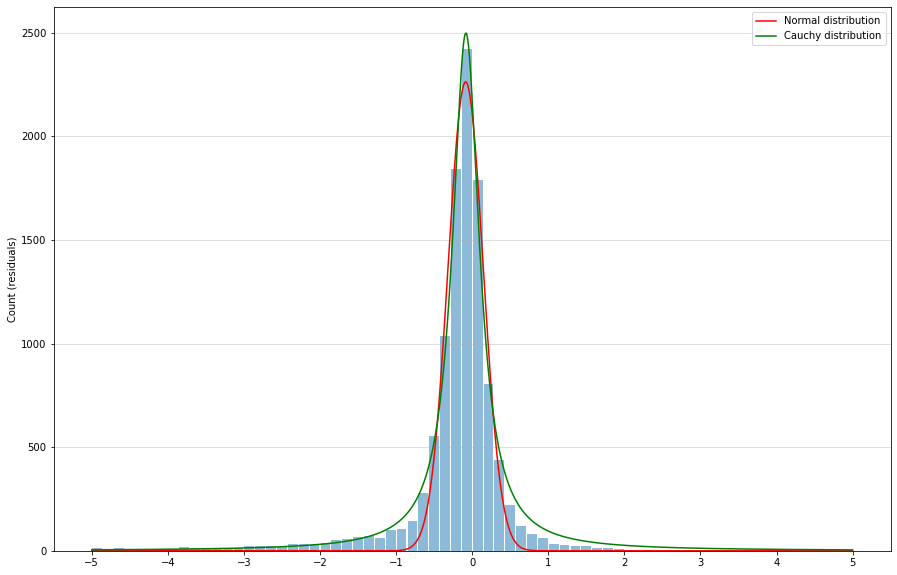

In [91]:
import math as m
import pickle
from matplotlib.ticker import MultipleLocator

# Reading file
filename = '/Users/Nicola/data/residuals_261.pkl'

with open(filename, 'rb') as f:
    data = pickle.load(f).item()
    
dataframe = pd.DataFrame(data)
display(dataframe.head())

# Suitable functions
def gauss(x, A, mu, std):
    return A*np.exp(-(x-mu)**2/(2*std**2))
def cauchy(x, A, x0, gamma):
    return A*gamma**2/((x-x0)**2+gamma**2)

# Histogram
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, _= ax.hist(dataframe['residuals'], bins=70, alpha=0.5, color='C0', range=(-5, 5), rwidth=0.9)

bin_centers = 0.5*(bins[1:]+bins[:-1])
poisson_unc = np.sqrt(n)

ax.set_ylabel('Count (residuals)')
ax.grid(axis='y', alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(1))

# Fit
popt_gauss, pcov_gauss = optimize.curve_fit(gauss, bin_centers, n, p0=[1000, 0, 10])
popt_cauchy, pcov_cauchy = optimize.curve_fit(cauchy, bin_centers, n, p0=[1000, 0, 10])

x_plot = np.linspace(-5, 5, 2000)
ax.plot(x_plot, gauss(x_plot, *popt_gauss), color='red', label='Normal distribution')
ax.plot(x_plot, cauchy(x_plot, *popt_cauchy), color='green', label='Cauchy distribution')
ax.legend();

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(t)$, which has 1 more parameter than $f(t)$.
$$g(t) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(t)$ and $g(t)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [92]:
def f(t, a, b, c):
    return a*np.cos(2*m.pi*t+b)+c

def g(t, a, b, c, d):
    return a*np.cos(2*m.pi*b*t+c)+d